In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
from sklearn.cluster import DBSCAN
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans

In [2]:
df = pd.read_parquet(r"E:\Hydroneo\Analytics\disease\data\cleaned_data_removed_ZERO.parquet", engine="pyarrow")

print(df.head())

                         id   latitude   longitude
0  66fd107a636caa2b6a7218b8  16.335354  102.254739
1  6707853b97fb7a0c60569ad7  13.706300  100.459700
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700
3  670e182e97fb7a0c60b38670  13.753165  100.494722
4  670e191297fb7a0c60b392a1  13.706300  100.459700


In [3]:
coords = df[['latitude', 'longitude']].to_numpy()

# Choose number of clusters (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

# Inspect results
print(df.head())

                         id   latitude   longitude  cluster
0  66fd107a636caa2b6a7218b8  16.335354  102.254739        2
1  6707853b97fb7a0c60569ad7  13.706300  100.459700        0
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700        0
3  670e182e97fb7a0c60b38670  13.753165  100.494722        0
4  670e191297fb7a0c60b392a1  13.706300  100.459700        0


In [4]:
print("Cluster centers (lat, lon):")
print(kmeans.cluster_centers_)

Cluster centers (lat, lon):
[[ 13.60647156 100.27249098]
 [  6.8893645  100.02277898]
 [ 16.33535391 102.25473855]]


In [ ]:
print(df['cluster'].nunique())   # number of unique clusters
print(df['cluster'].unique())    # which cluster IDs

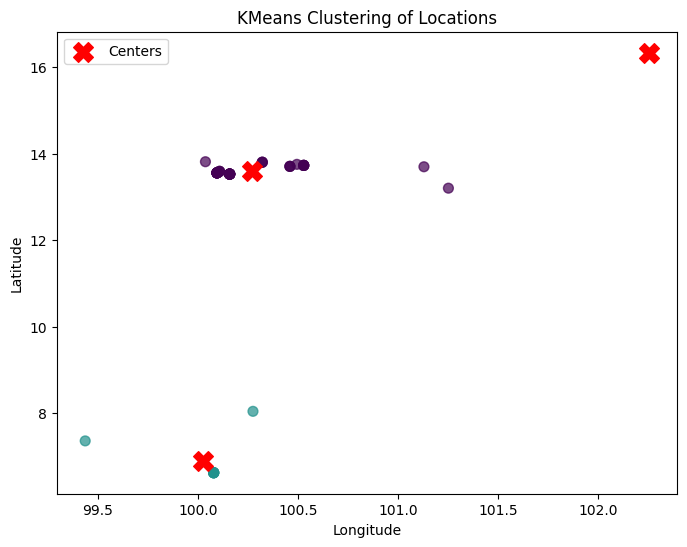

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            c='red', marker='X', s=200, label='Centers')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Locations")
plt.legend()
plt.show()